<a href="https://colab.research.google.com/github/prabhu2599/VectorBehta-Projects/blob/main/Dense_vs_Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.nn import relu, softmax
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [3]:
mnist = ds.fashion_mnist

In [4]:
(train_x,train_y) , (test_x,test_y) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
train_x = train_x / 225.0
test_x = test_x / 255.0

In [6]:
model = Sequential([
                    Flatten(),
                    Dense(128, activation=relu),
                    Dense(10, activation=softmax)
])

In [7]:
model.compile(optimizer = 'Adam',
             loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(train_x, train_y, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6282 - accuracy: 0.7819
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3800 - accuracy: 0.8632
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3425 - accuracy: 0.8732
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3117 - accuracy: 0.8842
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2939 - accuracy: 0.8919


In [8]:
model.evaluate( test_x, test_y )

313/313 [==============================] - 1s 2ms/step - loss: 0.3515 - accuracy: 0.8733


[0.3514799475669861, 0.8733000159263611]

## **CONV in action baby**

In [18]:
model1 = Sequential([
                    Conv2D(64, (3,3), activation='relu', input_shape = (28, 28, 1)),
                    MaxPooling2D(pool_size = (2,2), padding = 'same'),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')
])

In [19]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [20]:
train_x = train_x.reshape(-1,28,28,1)
model1.compile(optimizer = 'Adam',
             loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model1.fit(train_x, 
           train_y, 
           #validation_data=(test_x, test_y), 
           epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5900 - accuracy: 0.7864
Epoch 2/5
 896/1875 [=============>................] - ETA: 2s - loss: 0.3046 - accuracy: 0.8887

KeyboardInterrupt: ignored

In [12]:
model.evaluate( test_x, test_y )

313/313 [==============================] - 1s 2ms/step - loss: 0.3515 - accuracy: 0.8733


[0.3514799475669861, 0.8733000159263611]

In [26]:
test_images = test_x

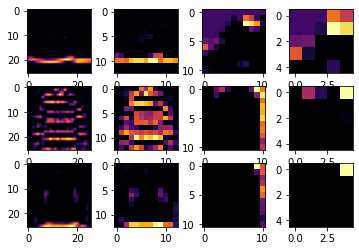

In [29]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model1.layers]
activation_model = tf.keras.models.Model(inputs = model1.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)